In [1]:
import numpy as np
import pandas as pd
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap
import pylab as pl
import matplotlib
import seaborn as sns
from datetime import datetime 
import scipy
from scipy.io import netcdf
from colour import Color
import netCDF4 as nc
from netCDF4 import Dataset as NetCDFFile 
import csv
from numpy import arange, dtype 
import xarray as xr
import matplotlib.gridspec as gridspec
#import cartopy.crs as ccrs
#from cartopy import feature as cf
import os
os.environ["PROJ_LIB"] = "/Users/onurhanaydin/opt/anaconda3/envs/geo_env2/share/basemap/epsg"
from mpl_toolkits.basemap import Basemap, shiftgrid
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option("display.max_columns", 20)
pd.set_option("display.max_rows", 20) 
pd.options.display.float_format = "{:.3f}".format 

ipath="/Users/onurhanaydin/Desktop/"
opath="/Users/onurhanaydin/Desktop/"

In [2]:
ds=xr.open_dataset(ipath+"output.nc")
ds

<xarray.Dataset>
Dimensions:       (lon: 480, lat: 241, height: 40, bnds: 2, height_2: 41, time: 21)
Coordinates:
  * lon           (lon) float32 0.0 0.75 1.5 2.25 ... 357.0 357.8 358.5 359.2
  * lat           (lat) float32 -90.0 -89.25 -88.5 -87.75 ... 88.5 89.25 90.0
  * height        (height) float64 1.0 2.0 3.0 4.0 5.0 ... 37.0 38.0 39.0 40.0
  * height_2      (height_2) float64 1.0 2.0 3.0 4.0 5.0 ... 38.0 39.0 40.0 41.0
  * time          (time) datetime64[ns] 2011-01-01 ... 2011-01-11
Dimensions without coordinates: bnds
Data variables:
    height_bnds   (height, bnds) float64 ...
    u             (time, height, lat, lon) float32 ...
    v             (time, height, lat, lon) float32 ...
    w             (time, height_2, lat, lon) float32 ...
    temp          (time, height, lat, lon) float32 ...
    pres          (time, height, lat, lon) float32 ...
    topography_c  (lat, lon) float32 ...
    pres_sfc      (time, lat, lon) float32 ...
    vor           (time, height, lat, lon) float32 ...
    div           (time, height, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.8.3rc (http://mpimet.mpg.d...
    Conventions:  CF-1.6
    uuidOfVGrid:  23686502-ef58-2189-e8b7-e9b06a152d80
    institution:  Max Planck Institute for Meteorology/Deutscher Wetterdienst
    title:        ICON simulation
    source:       Unknown@Unknown
    history:      ./icon at 20220428 135809
    references:   see MPIM/DWD publications
    comment:      s4449823 (s4449823) on blade5g (Linux 3.10.0-1160.59.1.el7....

In [3]:
nc = NetCDFFile(ipath+"output.nc")
nc

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    CDI: Climate Data Interface version 1.8.3rc (http://mpimet.mpg.de/cdi)
    Conventions: CF-1.6
    uuidOfVGrid: 23686502-ef58-2189-e8b7-e9b06a152d80
    institution: Max Planck Institute for Meteorology/Deutscher Wetterdienst
    title: ICON simulation
    source: Unknown@Unknown
    history: ./icon at 20220428 135809
    references: see MPIM/DWD publications
    comment: s4449823 (s4449823) on blade5g (Linux 3.10.0-1160.59.1.el7.x86_64 x86_64)
    dimensions(sizes): lon(480), lat(241), height(40), bnds(2), height_2(41), time(21)
    variables(dimensions): float32 lon(lon), float32 lat(lat), float64 height(height), float64 height_bnds(height, bnds), float64 height_2(height_2), float64 time(time), float32 u(time, height, lat, lon), float32 v(time, height, lat, lon), float32 w(time, height_2, lat, lon), float32 temp(time, height, lat, lon), float32 pres(time, height, lat, lon), float

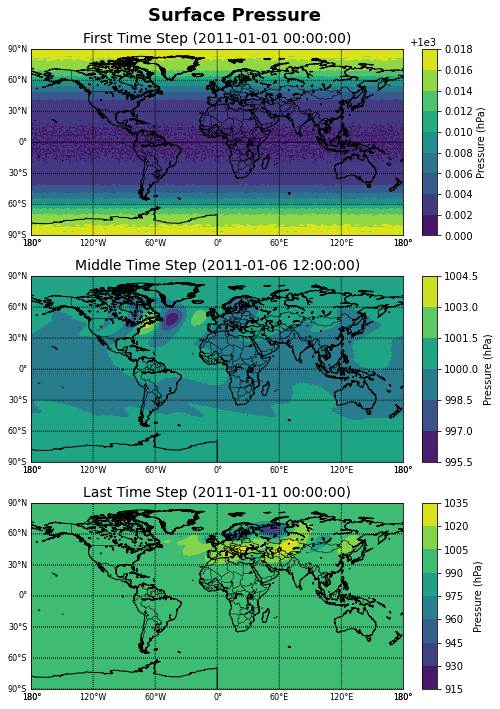

In [11]:
lat = nc.variables['lat'][:]
lon = nc.variables['lon'][:]
time = nc.variables['time'][:]
sp = nc.variables['pres_sfc'][:]
sp=sp/100

fig=plt.figure(figsize=(10,10))

fig.suptitle("Surface Pressure", fontsize=18, fontweight="bold")

fig.add_subplot(311)
plt.title("First Time Step (2011-01-01 00:00:00)", fontsize=14)
map = Basemap(projection='cyl',llcrnrlon=-180.,llcrnrlat=-90.,urcrnrlon=180.,urcrnrlat=90.,resolution='l')
map.drawcoastlines()
map.drawcountries()
parallels = np.arange(-90,91,30) # make latitude lines ever 5 degrees from 30N-50N
meridians = np.arange(-180,180,60.)
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=8)
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=8)
lons,lats= np.meshgrid(lon-180,lat)
x,y = map(lons,lats)
sfc_p = map.contourf(x,y,sp[0,:,:])
cb = map.colorbar(sfc_p,"right", size="4%", pad="5%")
cb.set_label('Pressure (hPa)')
plt.tight_layout()

fig.add_subplot(312)
plt.title("Middle Time Step (2011-01-06 12:00:00)", fontsize=14)
map = Basemap(projection='cyl',llcrnrlon=-180.,llcrnrlat=-90.,urcrnrlon=180.,urcrnrlat=90.,resolution='l')
map.drawcoastlines()
map.drawcountries()
parallels = np.arange(-90,91,30) # make latitude lines ever 5 degrees from 30N-50N
meridians = np.arange(-180,180,60.) # make longitude lines every 5 degrees from 95W to 70W
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=8)
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=8)
lons,lats= np.meshgrid(lon-180,lat)
x,y = map(lons,lats)
sfc_p = map.contourf(x,y,sp[11,:,:])
cb = map.colorbar(sfc_p,"right", size="4%", pad="5%")
cb.set_label('Pressure (hPa)')
plt.tight_layout()

fig.add_subplot(313)
plt.title("Last Time Step (2011-01-11 00:00:00)", fontsize=14)
map = Basemap(projection='cyl',llcrnrlon=-180.,llcrnrlat=-90.,urcrnrlon=180.,urcrnrlat=90.,resolution='l')
map.drawcoastlines()
map.drawcountries()
parallels = np.arange(-90,91,30) # make latitude lines ever 5 degrees from 30N-50N
meridians = np.arange(-180,180,60.) # make longitude lines every 5 degrees from 95W to 70W
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=8)
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=8)
lons,lats= np.meshgrid(lon-180,lat)
x,y = map(lons,lats)
sfc_p = map.contourf(x,y,sp[20,:,:])
cb = map.colorbar(sfc_p,"right", size="4%", pad="5%")
cb.set_label('Pressure (hPa)')
plt.tight_layout()

plt.show();
fig.savefig(opath+'surface_pressure.pdf')
fig.savefig(opath+'surface_pressure.png',facecolor='white', edgecolor='none', dpi=250)